<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyRANDOM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>RANDOM</b> <b style=color:red;>NUMBERS</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyRANDOM.png"></td>
</tr>
</table>

----
# `pyRANDOM`

pyRANDOM, a collection of jupyter notebooks playing with **random numbers** ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import libpyRANDOM

----
# Solution: Natural neighbours
In this notebook, we try to find the **shortest path** between all nodes, based
on **natural neighbours** for pathes.

First, we use the library `libpyRANDOM` with our previously discussed functions and create
**node arrays** `x`,  `y`,  and `cities`, and the **distance matrix** `matrix`, 
and correct for the not wanted pathes: 

In [2]:
x,y,cities = libpyRANDOM.setupCoordinatesSquare()
matrix = libpyRANDOM.createDistanceMatrix(x,y)
matrix[0][2] = np.nan
matrix[2][0] = np.nan
matrix[1][3] = np.nan
matrix[3][1] = np.nan
print(matrix)

[[0.         2.                nan 2.         1.56204994]
 [2.         0.         2.                nan 1.28062485]
 [       nan 2.         0.         2.         1.28062485]
 [2.                nan 2.         0.         1.56204994]
 [1.56204994 1.28062485 1.28062485 1.56204994 0.        ]]


Check, if is looks correct:

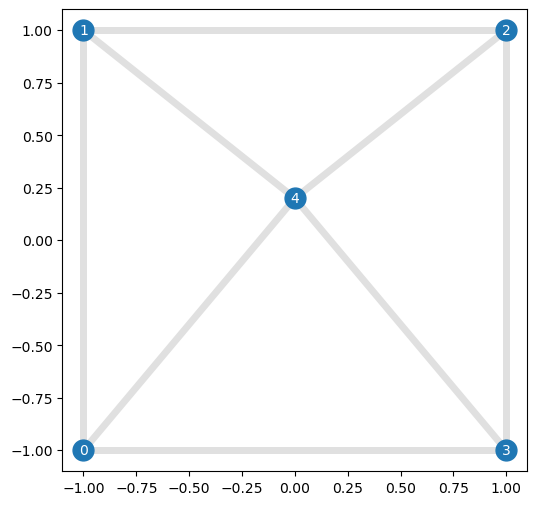

In [3]:
plt.figure(figsize=(6,6))
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
# plot all distances
for i in range(matrix.shape[0]):
        for j in range(i+1,matrix.shape[0]):
            if (np.isfinite(matrix[i][j])):
                plt.plot([x[i],x[j]],[y[i],y[j]],lw=5,alpha=0.7,color='lightgray')
# plot nodes
plt.plot(x,y,lw=0,marker='o',markersize=15)
for i in range(len(x)):
    plt.text(x[i],y[i],str(cities[i]),ha='center',va='center',color=(1,1,1))

----
## TSP with natural neighbors

Next, we replace the permutations with a natural neighbor search. 

Here, we start with a city, then look for the closest city next (shortest distance), move there,
and then find the next closest city and so on.

With this search strategy, we are saving quite a bit of time, but might miss the shortest path ...

We perform the following steps:
- loop over a fixed number of shuffles
- create a closed loop by adding `0` as start and as end point
- sum up all distances in the variable `total_dist`
- exclude loops with non-existing pathes by setting dist to `np.inf`
- check if the calculated variable `total_dist` is smaller than the current `total_dist_min`

In the example below, we defined the number of iterations $M$ to be the same as in the case of permutations.
This, however, does not guarantee to find the shortest path, as the random shuffle still might not
construct the best sequence ...

In [4]:
def tspNaturalNeigbours(matrix):
    """
    Solve traveling-salesmen problem
    version with natural neighbors
    input:
      matrix - matrix of distances between two points
    output:
      total_dist_min [m] - minimum distance
      total_dist_max [m] - maximum distance
      minorder           - list of points of shortest path
    """
    # get number of cities
    N = matrix.shape[0]
    # start from first location, put on stack best_path
    istart    = 0 #1
    i         = istart
    best_path = [i]
    # loop over remaining cities
    for n in range(1,N):
        rest = np.argsort(matrix[i][:])
        #print(rest)
        for j in range(1,len(rest)):
            onstack = False
            for k in range(len(best_path)):
                #print(n,j,k,best_path[k],rest[j])
                if (best_path[k]==rest[j]):
                    onstack = True
            if (onstack==False):
                best_path.append(rest[j])
                i = rest[j]
                break
    # print best result found
    print(best_path)
    best_path = np.r_[best_path,istart]
    # calculate distance
    total_dist_min = 0
    for i in range(1,len(best_path)):
        total_dist_min += matrix[best_path[i-1]][best_path[i]]
    print('min path: ',total_dist_min)
    print('best path: ',best_path)
    return total_dist_min,best_path

In [5]:
total_dist_min,minorder = tspNaturalNeigbours(matrix)

[0, 4, 1, 2, 3]
min path:  8.8426747826679
best path:  [0 4 1 2 3 0]


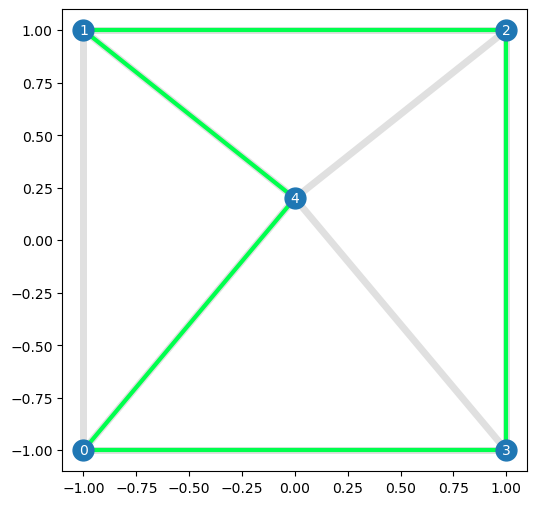

In [6]:
plt.figure(figsize=(6,6))
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
# plot all distances
for i in range(matrix.shape[0]):
        for j in range(i+1,matrix.shape[0]):
            if (np.isfinite(matrix[i][j])):
                plt.plot([x[i],x[j]],[y[i],y[j]],lw=5,alpha=0.7,color='lightgray')
# plot shortest distance
for i in range(1,len(minorder)):
            plt.plot([x[minorder[i-1]],x[minorder[i]]],[y[minorder[i-1]],y[minorder[i]]],lw=3,color=(0.0,1.0,0.3))
# plot nodes
plt.plot(x,y,lw=0,marker='o',markersize=15)
for i in range(len(x)):
    plt.text(x[i],y[i],str(cities[i]),ha='center',va='center',color=(1,1,1))

The resulting **shortest path** is [0,4,1,2,3], which is slightly longer than the best pathes found before.

The reason is clear: From `0` on, the closest neighbour is `4`, not `1`. Try to start from `1` instead ...

----